# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [3]:
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [6]:
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [24]:
pd.options.display.max_colwidth = 100

In [33]:
df[df.narr1.str.match(r".*penis.*zip.*", case=False)][['narr1', 'narr2']]

,narr1,narr2
15406,"A 18YOM CAUGHT PENIS IN PANTS ZIPPER, LACERATION TO PENIS",NaN
19855,48YOM WAS ZIPPING UP PANTS AT HOME AND CUT TIP OF PENIS IN ZIPPER. PE,NIS ABRASION*
22554,"21 YOM WITH WOUND TO PENIS AFTER GETTING CAUGHT IN ZIPPER OF PANTS,","SUPERFICIAL LACERATION NOTED, DX: PENILE LACERATION"
41923,4YOM SUSTAINED AN ABRASION TO PENIS CAUGHT IN HIS PANTS ZIPPER,NaN
56080,25 YOM GOT PENIS CAUGHT IN ZIPPER,DX ABRASION
57217,59 YOM GOT HIS PENIS FORESKIN STUCK IN ZIPPER THIS AM.,DX: PENILE FORESKIN STUCK IN ZIPPER REMOVED.
60920,12 YOM CAUGHT PENIS IN HIS PANTS ZIPPER AT SCHOOL,DX LACERATION
71180,38YOM CAUGHT FORESKIN OF PENIS IN ZIPPER OF PANTS THREE DAYS AGO SUSTAI,NED A LACERATION THAT GOT INFECTED CELLULITIS TO PENIS
87107,26YOM CAUGHT PENIS IN THE ZIPPER OF HIS PANTS SUSTAINED AN AVULSION TO,PENIS
101203,43YOM SUSTAINED AN ABRASION TO PENIS CAUGHT IT IN THE ZIPPER OF HIS PAN,TS


### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df.shape

(357727, 19)

### List the columns and their data types

In [4]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [5]:
#CPSC Case #      int64 - Case number
#trmt_date       object - Treatment Date
#psu              int64 - Primary Sampling Unit (statistical info relating to the SUDAAN model)
#weight         float64 - Weight (statistical info relating to the SUDAAN model)
#stratum         object - Stratum (statistical info relating to the SUDAAN model)
#age              int64 - Age
#sex              int64 - 1-digit-code for the Sex
#race             int64 - 1-digit-code for the race
#race_other      object - more info
#diag             int64 - 2-digit-code for the diagnose 
#diag_other      object - more info
#body_part        int64 - 4-digit-code for the affected body part
#disposition      int64 - 1-digit-code for the disposition (=result of the process)
#location         int64 - 1-digit-code for the location of the accident
#fmv              int64 - 1-digit-code wether fire was involved in accident
#prod1            int64 - 4-digit-code for objects involved in accident
#prod2          float64 - more info
#narr1           object - raw text describing the accident
#narr2           object - more info

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [6]:
df.sex.value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [7]:
df.sex.replace(2, "Female", inplace=True)
df.sex.replace(1, "Male", inplace=True)
df.sex.replace(0, "Unknown", inplace=True)

## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [8]:
df.sex.value_counts()

Male       195071
Female     162654
Unknown         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

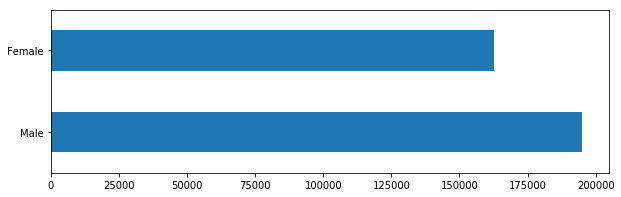

In [9]:
df[df.sex != "Unknown"].sex.value_counts().plot(kind="barh", figsize=(10,3))

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [10]:
df.sex.replace("Unknown", np.nan, inplace=True)

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

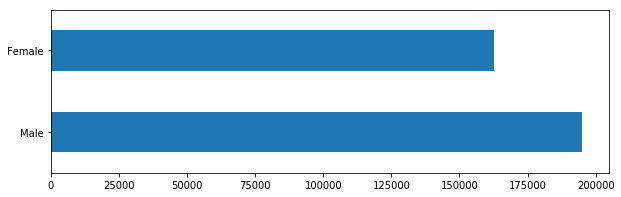

In [11]:
df.sex.value_counts().plot(kind="barh", figsize=(10,3))

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [12]:
df_wallpunchers = df[df.narr1.str.match(r".*punch.*wall.*", case=False)]
df_wallpunchers

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."
782,150805902,07/22/2015,3,74.8813,L,28,Male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN
1098,150455805,03/27/2015,93,15.0591,V,25,Female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.
1571,150519707,04/21/2015,77,15.0591,V,14,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN
1616,151112964,09/21/2015,26,15.7762,V,16,Male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN
1660,150446653,04/14/2015,33,15.0591,V,52,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN


In [13]:
df_wallpunchers.shape

(1772, 19)

## Graph the gender distribution of wall-punching.

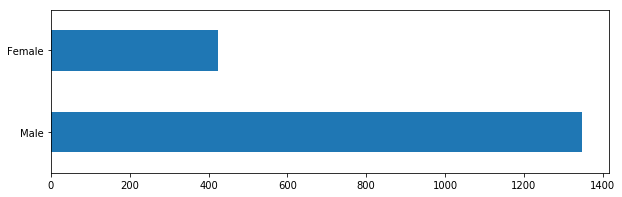

In [14]:
df_wallpunchers.sex.value_counts().plot(kind="barh", figsize=(10,3))

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [15]:
df_wallpunchers.age.mean()

24.303611738148984

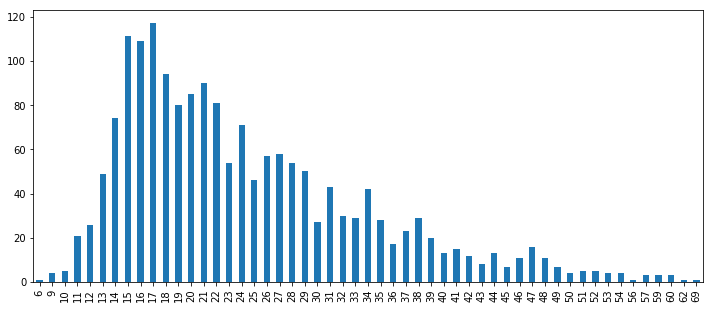

In [16]:
df_wallpunchers.age.value_counts().sort_index().plot(kind="bar", figsize=(12, 5))

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [17]:
df_wallpunchers.trmt_date.str.extract(r"\b(\d{2})/").value_counts().sort_values(ascending=False)

c:\users\simon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


09    175
06    170
05    162
10    162
04    156
03    151
11    145
12    142
07    134
01    132
08    131
02    112
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

c:\users\simon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


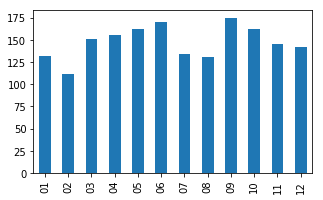

In [18]:
df_wallpunchers.trmt_date.str.extract(r"\b(\d{2})/").value_counts().sort_index().plot(kind="bar", figsize=(5,3))

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

In [19]:
#done

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

c:\users\simon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


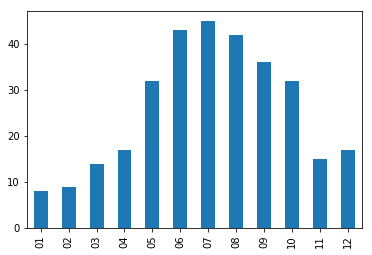

In [20]:
df[df.prod1 == 381].trmt_date.str.extract(r"\b(\d{2})/").value_counts().sort_index().plot(kind="bar")

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [21]:
#incidencts wher punching was involved in the field "narr1"
df_objectpunchers1 = df[df.narr1.str.match(r".*punch.*", case=False)]

In [22]:
#incidencts wher punching was involved in the field "narr2"
df_objectpunchers2 = df[df.narr2.str.match(r".*punch.*", na=False, case=False)]

In [23]:
#we put the two together and now have a df with all punching-related incidents
df_objectpunchers_all = df_objectpunchers1.append(df_objectpunchers2)
df_objectpunchers_all

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
10,150734952,07/04/2015,57,15.7762,V,20,Male,2,NaN,59,NaN,82,1,1,0,1894,NaN,20 YOM DX HAND LACERATION - S/P PT PUNCHED A W...,NaN
38,150508503,05/03/2015,21,15.0591,V,22,Male,0,NaN,53,NaN,82,1,0,0,1893,NaN,"22YM LHD, C/O RT HAND PAIN P PUNCHING A DOOR",>>CONTS
149,150503749,04/02/2015,53,15.0591,V,13,Male,1,NaN,59,NaN,33,1,0,0,1123,NaN,13YOM-FOREARM LAC-PUNCHED A PLASTIC CONTAINER ...,NaN
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
385,150741367,07/16/2015,18,5.6748,C,14,Male,2,NaN,59,NaN,34,1,1,0,1894,NaN,14 YOM THREW TANTRUM AND PUNCHED HAND THROUGH ...,RIST.
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
707,150957633,09/20/2015,58,15.7762,V,20,Male,0,NaN,59,NaN,33,4,1,0,1894,NaN,20 YOM WAS LOCKED OUT OF HOUSE SO PUNCHED A GL...,IN THE HOUSE & INJURED ARM DX LACERATION
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."


In [24]:
#view the top 10 products from field "prod1"
prod1_value_counts = df_objectpunchers_all.prod1.value_counts().sort_values(ascending=False)
prod1_value_counts.head(10)

1884    1843
1894     587
1893     250
1207     172
4004     125
276       76
4057      54
1892      52
1726      44
1807      42
Name: prod1, dtype: int64

In [25]:
#view the top 10 products from field "prod2"
prod2_value_counts = df_objectpunchers_all.prod2.value_counts().sort_values(ascending=False)
prod2_value_counts.head(10)

1884.0    37
1893.0    14
1807.0     8
1207.0     7
4056.0     6
1892.0     6
1865.0     5
604.0      5
1819.0     3
676.0      3
Name: prod2, dtype: int64

In [26]:
#Add the two value_counts
prod_total_value_counts = prod1_value_counts.add(prod2_value_counts, fill_value=0).sort_values(ascending=False)
prod_total_value_counts.head(10)

1884.0    1880.0
1894.0     589.0
1893.0     264.0
1207.0     179.0
4004.0     127.0
276.0       76.0
1892.0      58.0
4057.0      54.0
1807.0      50.0
1726.0      44.0
dtype: float64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [27]:
#I don't see why we need these steps

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [28]:
punchinginjuries = prod_total_value_counts.reset_index()
punchinginjuries.head()

,index,0
0,1884.0,1880.0
1,1894.0,589.0
2,1893.0,264.0
3,1207.0,179.0
4,4004.0,127.0


In [29]:
punch_columns = {
    'index': 'prod_id',
    0: 'incident_count'
}

In [30]:
punchinginjuries.rename(columns=punch_columns, inplace=True)

In [31]:
punchinginjuries.head()

,prod_id,incident_count
0,1884.0,1880.0
1,1894.0,589.0
2,1893.0,264.0
3,1207.0,179.0
4,4004.0,127.0


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [32]:
punchinginjuries.prod_id = punchinginjuries.prod_id.astype(str).str.pad(6, fillchar="0").str.rstrip("0").str.rstrip(".")

In [33]:
punchinginjuries.head()

,prod_id,incident_count
0,1884,1880.0
1,1894,589.0
2,1893,264.0
3,1207,179.0
4,4004,127.0


## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [34]:
df_cat = pd.read_csv("categories-cleaned.txt", header=None, names=["prod_id", "prod_desc"], dtype=str)

In [35]:
df_cat.shape

(803, 2)

### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [36]:
df_cat[df_cat.prod_id == "0102"]

,prod_id,prod_desc
0,0102,Wringer washing machines


In [37]:
merged = punchinginjuries.merge(df_cat, left_on="prod_id", right_on="prod_id")

In [38]:
merged.dtypes

prod_id            object
incident_count    float64
prod_desc          object
dtype: object

## Graph the top 10 most popular products for injuries 

In [39]:
#I assume you mean punching-related injuries...

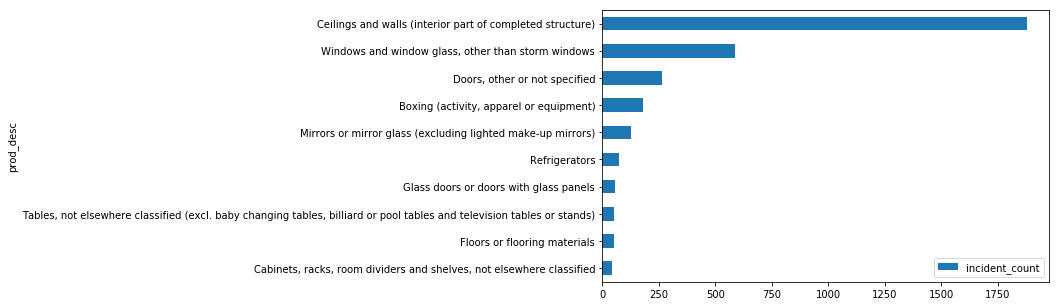

In [40]:
merged.sort_values('incident_count', ascending=False).head(10).sort_values('incident_count').plot(x='prod_desc', y='incident_count', kind="barh", figsize=(8,5))